```{warning}
Please note that this project underwent further editing after receiving the Best of Rest prize at the CANIS Hackathon. The revisions included incorporation of additional machine learning techniques, including feature selection and engineering.
```

# Misinformation Analysis
Jenny Lee, April 2023

```{note}
Kindly note that this web page solely offers a synopsis of the **Misinformation Analysis** project. The comprehensive set of scripts and codes used in the project is available in the corresponding [GitHub repository](https://github.com/jlee2843/misinformation-analysis).
```

In [2]:
import pandas as pd 
import numpy as np
import IPython
from IPython.display import YouTubeVideo
from IPython.display import HTML
from myst_nb import glue
import fontawesome
import schemdraw
from schemdraw.flow import *
from schemdraw import flow
import plotly.io as pio
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.offline as py
from IPython import display

## Project Outline

```{admonition} Data science toolbox used in this project
:class: tip, dropdown
- Natural language processing (NLP)
- Sentimental Analysis
- Text characteristic exploration
- Feature selection
- Classification modeling comparison
- Feature importance
```

<!-- {bdg-light}`NLP` {bdg-light}`Sentiment analysis` {bdg-light}`Text characteristic exploration` {bdg-light}`Feature selection` {bdg-light}`Supervised learning` {bdg-light}`Classification modeling` {bdg-light}`Feature importance` -->

As evident from the case of COVID-19 where a large amount of misleading information drove the general population into dramatic confusion, *fake news* plays a critical role in manipulating people into misguided thoughs and drive the society into disorganization. 

Through the Misinformation Analysis project, I set out to address three fundamental questions related to the analysis and classification of *fake news* versus *true news*. The primary objective of this project is to generate innovative approaches for characterizing fake news, enabling a more effective distinction between propaganda, bias, and subjective opinions from factual information.

I am delighted to share that the Misinformation Analysis received a Special Prize at the [2023 CANIS Hackathon: Misinformation Visualization](https://canis-hackathon.devpost.com), hosted by the University of Calgary. All participants were asked to work on the same set of data which can be retrieved from Kaggle [^ref1]. This recognition highlights the project's contribution to addressing challenges in misinformation and its impact on society.

In [1]:
from IPython.display import YouTubeVideo, display, HTML

video_id = "_6XdZhs73oE"

# Define HTML and CSS styles to center the video
video_html = f"""
<div style="display: flex; justify-content: center;">
    <iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}" frameborder="0" allowfullscreen></iframe>
</div>
"""

# Display the centered YouTube video
display(HTML(video_html))

## Overall Process
### Data Preprocessing

We initiate the text data preprocessing step by conducting preliminary analysis before applying lemmatization and stopwords removal. Utilizing the `textstats` library, we calculate key metrics such as reading score, reading time, and total character count. 

*True news* exhibits extended reading times and greater overall character lengths. In contrast, *fake news* demonstrates a higher reading score, possibly stemming from the intentional use of complex vocabulary to persuade readers.

Please open the following cell to view the flowchart illustrating the data preprocessing step.

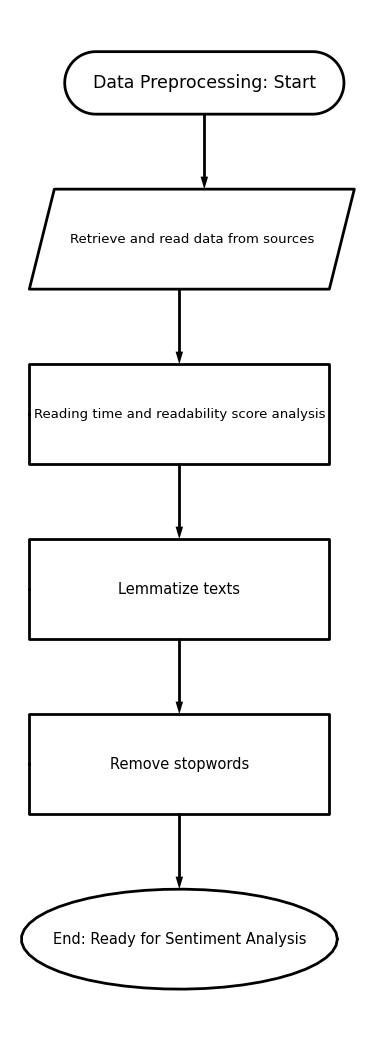

In [30]:
with schemdraw.Drawing() as d:
      d += Start().label("Data Preprocessing: Start")
      d += Arrow().down(d.unit/2)
      
      d += Data(w=6).label("Retrieve and read data from sources", fontsize=11)
      d += Arrow().down(d.unit/2)

      d += Box(w=6).label("Reading time and readability score analysis", fontsize=11)
      d += Arrow().down(d.unit/2)

      d += Box(w=6).label("Lemmatize texts", fontsize=12)
      d += Arrow().down(d.unit/2)

      d += Box(w=6).label("Remove stopwords", fontsize=12)
      d += Arrow().down(d.unit/2)

      d+= (end := Ellipse().label("End: Ready for Sentiment Analysis", fontsize=12))

````{tab-set}
```{tab-item} Reading Time
Returns the [reading time](https://pypi.org/project/textstat/) of the given text. 
Assumes 14.69ms per character.

 Fake News   | True News |
| :-------------        | ----------------------- | 
| 31.2974| 39.5976 | 
```

```{tab-item} Readability Score
Returns the [Flesch Reading Ease Score](https://pypi.org/project/textstat/). Maximum score is 121.22. 

| Fake News   | True News |
| :-------------        | ----------------------- | 
| 58.0174 | 54.8398 | 
```

```{tab-item} Average Word Count
Returns the average number of words included in the given text.

| Fake News   | True News |
| :-------------        | ----------------------- | 
| 2565.2889 | 3246.0628 | 
```
````

### Text Analysis
#### Sentiment Analysis

In [21]:
nlp_df = pd.read_csv("projects/misinformation-analysis/csv/nlp_summary.csv")
nlp_melt = pd.melt(nlp_df, id_vars=["News Type"], 
                   value_vars=["Negative", "Positive", "Neutral", "Compound", "Subjectivity"],
                   var_name="Type", 
                   value_name="Value")
categories = ["Negative", "Positive", "Neutral", "Compound", "Subjectivity"]
fake_melted = nlp_melt[nlp_melt["News Type"] == "Fake News"]
fake_melted_list = fake_melted["Value"].tolist()
true_melted = nlp_melt[nlp_melt["News Type"] == "True News"]
true_melted_list = true_melted["Value"].tolist()

radar_fig = go.Figure()
radar_fig.add_trace(go.Scatterpolar(r=true_melted_list,
                                   theta=categories,
                                   fill="toself",
                                   name="True News"))
radar_fig.add_trace(go.Scatterpolar(r=fake_melted_list,
                                   theta=categories,
                                   fill="toself",
                                   name="Fake News"))
radar_fig.update_layout(title={'text': "Radar Chart on Sentiment Analysis",
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                         legend_title="News Type",
                        height=500, width=600,)
radar_fig.show()

By conducting sentiment analysis, our objective is to identify potential distinctions in the nuances of language used between true and fake news articles.

As depicted in the radar chart, the most pronounced contrast between true and fake news lies in their `compound` scores. The `compound` score is a metric that aggregates lexicon ratings, normalized within the range of -1 to 1. Notably, genuine news articles demonstrated a positive `compound` score, while fake news registered a negative score. This observation suggests that, on average, fake news tends to incorporate more negative content compared to true news.

#### Most Mentioned Words

In [34]:
with open('projects/misinformation-analysis/figure/top20_words.json', 'r') as f:
    fig = pio.from_json(f.read())
fig.show()

In this analysis, we conducted an in-depth examination of text content by identifying the most frequently used words in both true and fake news. The bar graph highlights that the term `Trump` emerged as the most frequently mentioned word in both categories of news. Building upon these findings, we proceeded to compare the prevalence of mentions for specific individuals and countries in each type of news, aiming to discern patterns in their frequency of occurrence.

##### Most Mentioned Individuals

In [33]:
with open('projects/misinformation-analysis/figure/human_name_bar.json', 'r') as f:
    fig = pio.from_json(f.read())
fig.show()

##### Most Mentioned Countries

In [37]:
with open('projects/misinformation-analysis/figure/countries_bar.json', 'r') as f:
    fig = pio.from_json(f.read())
fig.show()

### Modeling and Feature Selection

In [3]:
results_df = pd.read_csv("projects/misinformation-analysis/csv/results_df.csv")
results_df

,model,train_score,test_score,validation_score,best_estimators
0,logisticregression,0.974714,0.941029,0.93235,"[CountVectorizer(max_features=105000, stop_wor..."
1,linearsvc,0.989002,0.939118,0.92985,"[CountVectorizer(max_features=137000, stop_wor..."
2,multinomialnb,0.892470,0.895588,0.89347,"[CountVectorizer(max_features=59000, stop_word..."


In [8]:
print(f"Best estimators: {results_df['best_estimators'].iloc[0]}")

Best estimators: [CountVectorizer(max_features=105000, stop_words='english'), LogisticRegression(C=0.1)]


Now we want to find out what is the most effective model in accurately classifying a news into true and fake news. Using `RandomSearchCV`, I tested out three different classification models: logistic regression, SVC, and native bayes. Notice that for SVC, `LinearSVC()` was used since our dataset was large. 

As a result, logistic regression showed the highest test score accuracy while demonstrating a reduced inclination towards overfitting, as opposed to the SVC model. The optimal hyperparameters for logistic regression include a `max_features` value of 105,000 for `CountVectorizer()` and a `C` value of 0.1 for `LogisticRegression()`.

```{figure} _images/confusion_matrix.png
---
name: confusion_matrix
---
Confusion Matrix for Logistic Regression
```

Applying the logistic regression model with optimized hyperparameters on the test dataset showed 361 instances of false negatives (Type 1 error) and 441 instances of false positives (Type 2 error). Despite these errors, the overall performance of our model remains robust, achieving a moderate accuracy rate of 94.1% on the test data.

### Feature Importance

In [43]:
feature_df = pd.read_csv("projects/misinformation-analysis/csv/feature_importance.csv")
feature_df

,Feature,Coef
0,featured,3.560679
1,said,3.206235
2,com,2.194433
3,according,1.702871
4,getty,1.590711
5,images,1.445811
6,nbsp,1.108408
7,added,1.104433
8,wfb,1.031694
9,posted,0.988372


Performing feature importance analytics on the our best model showed that the features shown on the dataframe above are the most influencial features that distinguishes true news from fake news. On the right side of the dataframe, corresponding coefficient values are shown. 

However, it's important to note that not all the words listed in the dataframe may intuitively appear as the most influential. This discrepancy could be attributed to the possibility that these words co-occur with other *truly* influential terms, and our coefficients may be affected by collinearity issues.

```{figure} _images/shap.png
---
name: shap
---
SHAP Values on Single Test Datapoint
```

By using the `shap` library, we can examine individual data points and their predicted outcomes. In the instance above, I am utilizing the *first* data point from the test set, which is, in reality, a piece of fake news. The higher the `shap` values, the more indicative they are of our predictions. As the figure above shows a positive derivative number, our model has correctly identified and predicted the news as fake.

## Final Deliverable

```{figure} _images/app_main_page.png
---
name: misinformation-app
---
SHAP Values on Single Test Datapoint
```

As the final deliverable, we developed and deployed a web-based interactive application utilizing `Plotly Dash` and launched it on `Heroku`. The above screenshot captures the appearance of the web application during the hackathon. Unfortunately, the application is no longer accessible due to license expiration. However, the contents are still available for exploration through the YouTube video provided above.

Furthermore, we successfully built an effective model capable of accurately classifying news articles as either fake or true.

## Conclusion

Reflecting on the analysis we performed so far, a more accurate Fake News detection model can be created by
filtering articles based on the sentiment analysis scores prior to creating the model. For example, as 'Compound' score
showed distinguishable differences between Fake News and True News articles, filtering the articles within the lower 0.005 quantile of the 'Compound' score may create more accurate model and result in a higher accuracy value.

## References
[^ref1]: Misinformation & Fake News Text Dataset 79k. (2021). Retrieved April 2023, from https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k?resource=download.